In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import gudhi
from pogo import Pogo
from scipy.sparse import csr_matrix
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from umap import UMAP,plot


/home/a/Desktop/ds/env/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/a/Desktop/ds/env/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/a/Desktop/ds/env/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
pogo=Pogo()


In [3]:
hf = h5py.File('Quake_Smart-seq2_Diaphragm/data.h5', 'r')

In [4]:
hf

<HDF5 file "data.h5" (mode r)>

In [5]:
hf.keys()

<KeysViewHDF5 ['exprs', 'obs', 'obs_names', 'uns', 'var', 'var_names']>

In [6]:
exprs = hf.get('exprs')
np.array(exprs)

array(['data', 'indices', 'indptr', 'shape'], dtype='<U7')

In [7]:
obs = hf.get('obs')
np.array(obs)

array(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'channel',
       'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender',
       'organ', 'organism', 'platform', 'region'], dtype='<U19')

In [49]:
y = np.array(obs.get('cluster'))
y.shape

(870,)

In [9]:
obs_names = hf.get('obs_names')
np.array(obs_names)

array([b'A8.D042105.3_11_M.1.1', b'K10.D042105.3_11_M.1.1',
       b'L13.D042105.3_11_M.1.1', b'M15.D042105.3_11_M.1.1',
       b'N17.D042105.3_11_M.1.1', b'O19.D042105.3_11_M.1.1',
       b'P22.D042105.3_11_M.1.1', b'A9.D042105.3_11_M.1.1',
       b'B12.D042105.3_11_M.1.1', b'C14.D042105.3_11_M.1.1',
       b'B11.D042105.3_11_M.1.1', b'D16.D042105.3_11_M.1.1',
       b'E19.D042105.3_11_M.1.1', b'C13.D042105.3_11_M.1.1',
       b'D15.D042105.3_11_M.1.1', b'E18.D042105.3_11_M.1.1',
       b'F21.D042105.3_11_M.1.1', b'H2.D042105.3_11_M.1.1',
       b'I4.D042105.3_11_M.1.1', b'J8.D042105.3_11_M.1.1',
       b'F22.D042105.3_11_M.1.1', b'A10.D042105.3_11_M.1.1',
       b'C15.D042105.3_11_M.1.1', b'D17.D042105.3_11_M.1.1',
       b'E20.D042105.3_11_M.1.1', b'G1.D042105.3_11_M.1.1',
       b'H4.D042105.3_11_M.1.1', b'I6.D042105.3_11_M.1.1',
       b'H3.D042105.3_11_M.1.1', b'J10.D042105.3_11_M.1.1',
       b'K12.D042105.3_11_M.1.1', b'L15.D042105.3_11_M.1.1',
       b'I5.D042105.3_11_M.1.1', 

In [10]:
uns = hf.get('uns')
np.array(uns)

array(['expressed_genes', 'scmap_genes', 'seurat_genes'], dtype='<U15')

In [11]:
var = hf.get('var')
np.array(var)

array([], dtype=float64)

In [12]:
var_names = hf.get('var_names')
np.array(var_names)

array([b'0610005C13Rik', b'0610007C21Rik', b'0610007L01Rik', ..., b'a',
       b'l7Rn6', b'zsGreen_transgene'], dtype='|S19')

In [13]:
data = np.array(exprs.get('data'))

In [14]:
num_rows = np.array(exprs.get('shape'))[0]
num_columns = np.array(exprs.get('shape'))[1]


In [15]:
num_rows


870

In [16]:
indices = np.array(exprs.get('indices'))

In [17]:
indptr = np.array(exprs.get('indptr'))

In [18]:
matrix = csr_matrix((data, indices, indptr), shape=(num_rows, num_columns)).toarray()

In [19]:
matrix

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 101.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  67.,   0., ...,   0.,   0.,   0.]])

In [20]:
from sklearn.decomposition import SparsePCA
transformer = SparsePCA(n_components=2, random_state=0)
transformer.fit(matrix)

SparsePCA(n_components=2, random_state=0)

In [21]:
transformer

SparsePCA(n_components=2, random_state=0)

In [22]:
matrix

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 101.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  67.,   0., ...,   0.,   0.,   0.]])

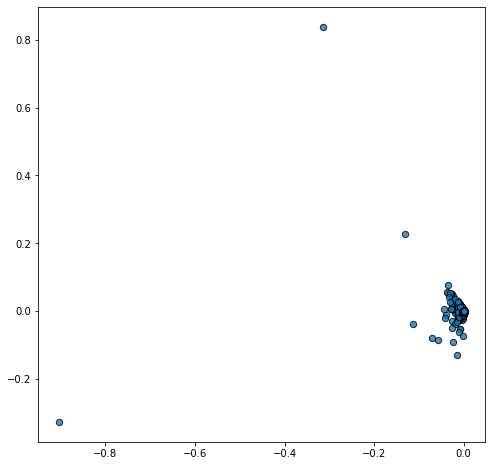

In [23]:
X=transformer.components_.T[:,0]
y=transformer.components_.T[:,1]
plt.figure(figsize=(8,8))
scatter = plt.scatter(X,y,
            s=40, 
            #c=c,
            marker="o",
            #cmap=cmap,
            norm=None,
            alpha=.8,
            edgecolor="k",
            vmin = 0)

plt.show()

In [24]:
from sklearn.decomposition import PCA
transformer = PCA(n_components=2, random_state=0)
transformer.fit(matrix)

PCA(n_components=2, random_state=0)

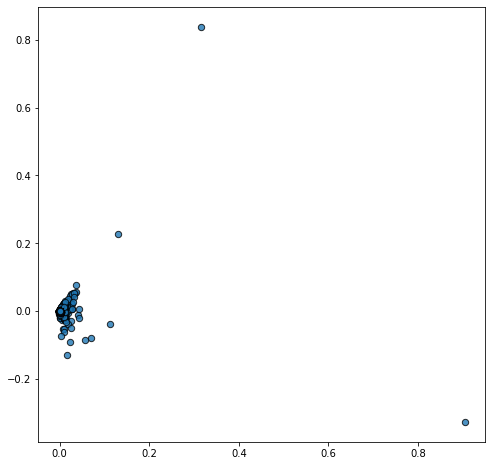

In [25]:
X=transformer.components_.T[:,0]
y=transformer.components_.T[:,1]
plt.figure(figsize=(8,8))
scatter = plt.scatter(X,y,
            s=40, 
            #c=c,
            marker="o",
            #cmap=cmap,
            norm=None,
            alpha=.8,
            edgecolor="k",
            vmin = 0)

plt.show()

In [27]:
Y = pdist(matrix, 'euclidean')

In [28]:
Y.shape

(378015,)

In [29]:
mdist = squareform(Y, force='no', checks=True)

In [30]:
mdist.shape

(870, 870)

In [31]:
mdist

array([[    0.        , 63884.38081409, 58721.96869145, ...,
        33937.65542874, 28578.5884361 , 30398.39249039],
       [63884.38081409,     0.        , 42612.61997343, ...,
        78083.04215385, 66958.41874626, 55638.22362369],
       [58721.96869145, 42612.61997343,     0.        , ...,
        64793.9376871 , 58502.01618748, 55016.62398766],
       ...,
       [33937.65542874, 78083.04215385, 64793.9376871 , ...,
            0.        , 16836.67933412, 32883.00202232],
       [28578.5884361 , 66958.41874626, 58502.01618748, ...,
        16836.67933412,     0.        , 22116.03520073],
       [30398.39249039, 55638.22362369, 55016.62398766, ...,
        32883.00202232, 22116.03520073,     0.        ]])

In [32]:
from scipy.spatial.distance import is_valid_dm

In [33]:
is_valid_dm(mdist)

True

In [36]:
import seaborn as sns#; sns.set_theme()


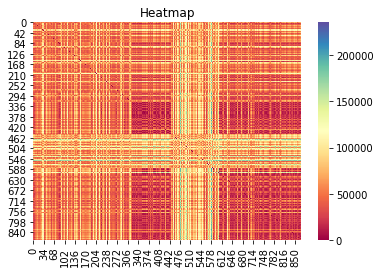

In [37]:
#Heatmap

ax = sns.heatmap(mdist,cmap='Spectral')#, vmin=0, vmax=1, center=0.8)

plt.title('Heatmap')
plt.savefig('heatmap',dpi=100)

/home/a/Desktop/ds/env/lib/python3.8/site-packages/umap/umap_.py:1503: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Unlabeled UMAP Embedding in 2D')

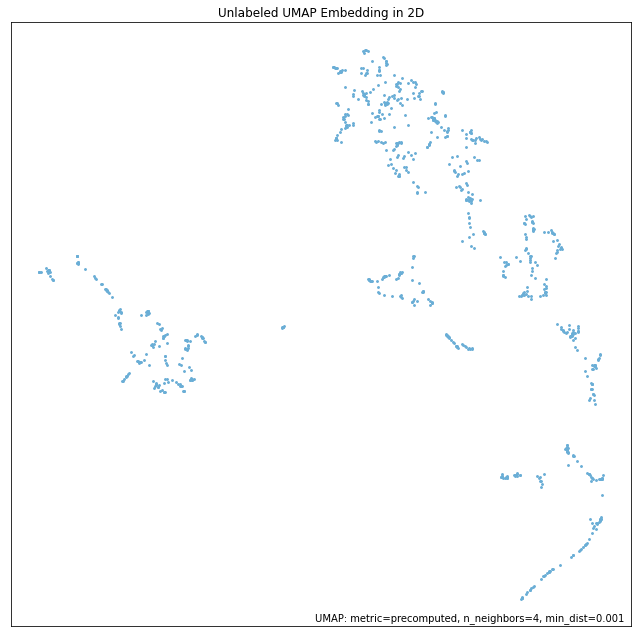

In [57]:
#Create 2-d umap dimensionality reduction embedding to visualize unsupervised models
umap_model_2d = UMAP(metric='precomputed',min_dist=0.001,n_neighbors=4)
umap_embedding = umap_model_2d.fit_transform(mdist)
plot.points(umap_model_2d)

plt.title('Unlabeled UMAP Embedding in 2D')

In [58]:
umap_embedding.shape

(870, 2)

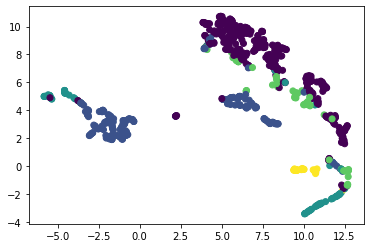

In [59]:
plt.scatter(umap_embedding[:,0], umap_embedding[:,1],c=y)

usetex mode requires TeX.


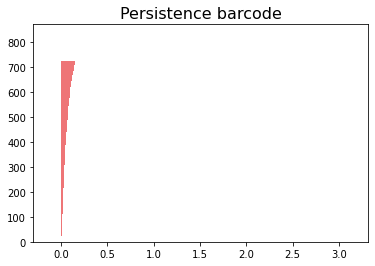

In [60]:
rips_complex = gudhi.RipsComplex(points=umap_embedding)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
diag = simplex_tree.persistence()

gudhi.plot_persistence_barcode(diag)
plt.show()

In [61]:
persistence_module = simplex_tree.persistence()

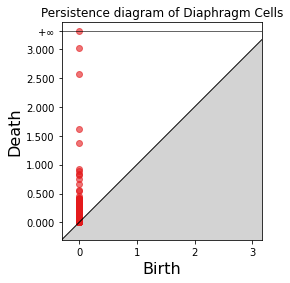

In [62]:
ax = gudhi.plot_persistence_diagram(persistence=persistence_module)
# We can modify the title, aspect, etc.
ax.set_title("Persistence diagram of Diaphragm Cells")
ax.set_aspect("equal")  # forces to be square shaped
plt.show()

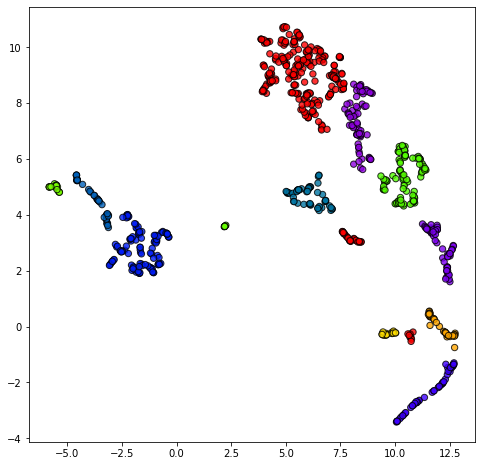

In [63]:

pogo.fit(umap_embedding)
pogo.plot()

In [64]:
pogo.labels_

array([ 0,  1,  1,  2,  3,  2,  4,  3,  5,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  1,  2,  3,  3,  3,  3,  3,  3,  3,  1,  2,  1,  1,  3,  1,  1,
        3,  3,  0,  3,  3,  3,  1,  1,  1,  0,  4,  3,  3,  6,  3,  3,  3,
        3,  3,  1,  7,  3,  6,  3,  3,  2,  3,  2,  3,  3,  3,  3,  3,  2,
        3,  1,  1,  5,  1,  3,  0,  3,  3,  3,  3,  3,  5,  8,  1,  1,  1,
        0,  1,  1,  9,  2,  4, 10,  3,  0,  2,  2,  1,  1,  3,  6,  6,  6,
        3,  3,  2,  2,  3,  3,  6,  0,  4, 10,  3,  3,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  1,  1,  3,  3,  2,  3,  0,  2,  3,  3,  1,  1,  1,
        1,  0,  0,  1,  1,  0,  4,  6,  6,  3,  3,  1,  1,  0,  3,  6,  6,
        4,  3,  3,  2,  0,  3,  3,  3,  1,  3,  4, 10,  3,  3,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  1,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1,
        1,  0,  3,  8,  1,  3, 11,  4, 10,  4,  3,  3,  3,  1,  1,  3,  3,
        4,  4,  3,  3,  0,  3,  7,  3,  0,  0, 10,  2,  2,  3,  3,  0,  2,
        7,  3,  0,  5,  3

In [65]:
pogo.candidates_

[36126,
 15609,
 28553,
 6407,
 8195,
 10022,
 11936,
 13636,
 62790,
 6002,
 5234,
 15016,
 13217,
 4855,
 5773,
 7980,
 4722,
 4235,
 4166,
 5154,
 5662,
 4459,
 3530,
 4104,
 3735,
 5600,
 4053,
 3874,
 3622,
 3954,
 4611,
 3794,
 4348,
 3922,
 5943,
 4669,
 5739,
 3681,
 4426,
 4586,
 3601,
 4013,
 4390,
 4037,
 5123,
 3710,
 4556,
 4535,
 3857,
 3510,
 3491,
 3847,
 4710,
 3592,
 3674,
 5150,
 3490,
 3842,
 3679,
 3869,
 4008,
 3485,
 4853,
 75971,
 26001,
 25528,
 25540,
 25539,
 26245,
 25538,
 25537,
 26246,
 25536,
 25535,
 25534,
 25533,
 25532,
 25531,
 25530,
 25529,
 26247,
 26255,
 25527,
 26248,
 26249,
 25526,
 25525,
 25524,
 26250,
 26251,
 25523,
 25522,
 25521,
 26252,
 25520,
 26253,
 26244,
 25541,
 25542,
 25543,
 26235,
 25563,
 26236,
 25562,
 25561,
 25560,
 25559,
 25558,
 26237,
 25557,
 25556,
 25555,
 26238,
 25554,
 25553,
 26239,
 25552,
 26240,
 25551,
 25550,
 25549,
 25548,
 25547,
 25546,
 26241,
 26242,
 25545,
 26243,
 25544,
 26254,
 26256,
 25565

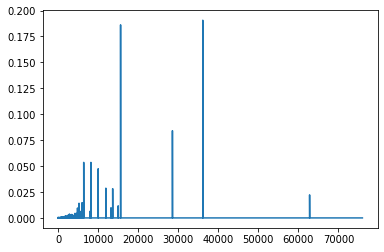

In [66]:
plt.plot(pogo.gap_vector_)

Maximum Silhouette: 6002


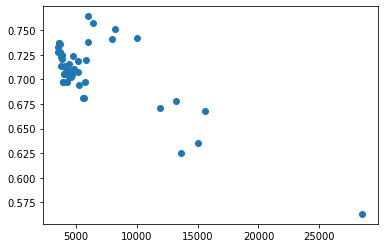

In [67]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 15609


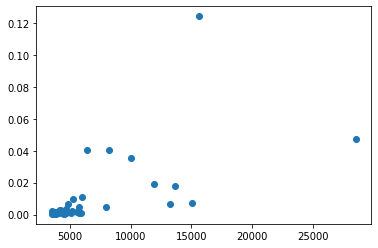

In [68]:
score_indices, score_array = pogo.plot_silhouette_score()

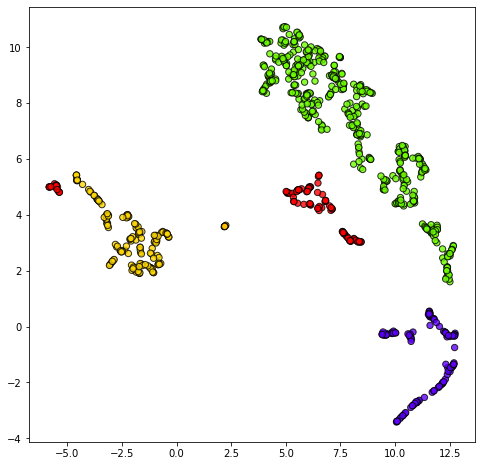

In [69]:
pogo.plot(15000)

Maximum Rand Score: 13636


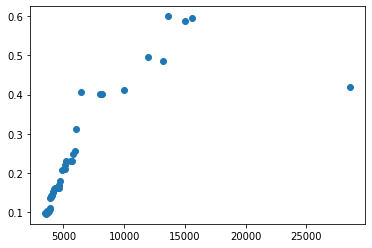

In [70]:
rand_indices, rand_array = pogo.plot_rand_score(y)
